In [3]:
def describe(x):
    print("Type:{}".format(x.type()))
    print("Shape/size: {}".format(x.shape))
    print("Values: \n{}".format(x))
    

In [3]:
import torch
describe(torch.Tensor(2,3)) #create a tensor with 2 rows, 3 columns

Type:torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1.3733e-14, 6.4069e+02, 4.3066e+21],
        [1.1824e+22, 4.3066e+21, 6.3828e+28]])


In [4]:
describe(torch.rand(2,3))#uniform random
describe(torch.rand(2,3))#random normal

Type:torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.1144, 0.8529, 0.6214],
        [0.3426, 0.5373, 0.7541]])
Type:torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.3745, 0.5927, 0.4650],
        [0.0279, 0.8460, 0.8849]])


In [5]:
x = torch.zeros(2,3)
describe(x)
x.fill_(1) #an in-place operation for fill it with specific values
describe(x)

Type:torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Type:torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [6]:
x = torch.Tensor([[1,2,3],
                [2,3,4]])
describe(x)#create a tensor from a list

Type:torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [2., 3., 4.]])


In [7]:
"""
create a tensor from numpy, type: double
"""
import numpy as np
npy = np.random.rand(2,3)
describe(torch.from_numpy(npy))

Type:torch.DoubleTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.9928, 0.7848, 0.5853],
        [0.4930, 0.2948, 0.1953]], dtype=torch.float64)


In [8]:
x = x.long() #change tensor type
describe(x)

Type:torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [2, 3, 4]])


In [10]:
"""
tensor operation
"""
describe(torch.add(x,x))
describe(x + x)

Type:torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[2, 4, 6],
        [4, 6, 8]])
Type:torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[2, 4, 6],
        [4, 6, 8]])


In [15]:
"""
dimension base tensor operation
"""
x = torch.arange(6) #returns a 1-d tensor
describe(x)
x = x.view(2,3) #like reshape
describe(x)
describe(torch.sum(x, dim = 0)) #return 1-d row-shape tensor, every row with same column add together
describe(torch.sum(x, dim = 1))
describe(torch.transpose(x, 0, 1))#The given dimensions dim0 and dim1 are swapped.

Type:torch.LongTensor
Shape/size: torch.Size([6])
Values: 
tensor([0, 1, 2, 3, 4, 5])
Type:torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])
Type:torch.LongTensor
Shape/size: torch.Size([3])
Values: 
tensor([3, 5, 7])
Type:torch.LongTensor
Shape/size: torch.Size([2])
Values: 
tensor([ 3, 12])
Type:torch.LongTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [17]:
x = torch.arange(6).view(2,3)
describe(x)
describe(x[:1,:2]) #slice 
describe(x[1,2])#index

Type:torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])
Type:torch.LongTensor
Shape/size: torch.Size([1, 2])
Values: 
tensor([[0, 1]])
Type:torch.LongTensor
Shape/size: torch.Size([])
Values: 
5


In [5]:
"""
concatenating tensors
"""
import torch
x = torch.arange(6).view(2,3)
describe(torch.cat([x,x], dim = 0)) #concatenate 2 matrix in dimension 0
describe(torch.cat([x,x], dim = 1))#dimension 1
describe(torch.stack([x,x])) #stack 2 matrixs

Type:torch.LongTensor
Shape/size: torch.Size([4, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])
Type:torch.LongTensor
Shape/size: torch.Size([2, 6])
Values: 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])
Type:torch.LongTensor
Shape/size: torch.Size([2, 2, 3])
Values: 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


In [10]:
"""
linear multiplication
"""
x1 = torch.arange(6).view(2, 3)
x1 = x1.float()
describe(x1)
x2 = torch.ones(3,2)
x2[:, 1] += 1
describe(x2)
describe(torch.mm(x1, x2))

Type:torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0., 1., 2.],
        [3., 4., 5.]])
Type:torch.FloatTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])
Type:torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[ 3.,  6.],
        [12., 24.]])


In [16]:
"""
gradient bookkeeping
"""
x = torch.ones(2, 2, requires_grad = True)
describe(x)
print(x.grad is None)
y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)
z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

Type:torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True
Type:torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True
Type:torch.FloatTensor
Shape/size: torch.Size([])
Values: 
21.0
False


In [18]:
"""
check if nvida can use 
"""

print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)

False
cpu


In [9]:
"""
Create a 2D tensor and then add a dimension of size 1 inserted at dimension 0
remove dimension2
"""
import torch
a = torch.rand(3,3)
b = torch.unsqueeze(a, 0)
describe(b)
b = torch.squeeze(b)
describe(b)

"""
Create a random tensor of shape 5x3 in the interval [3, 7)
"""
c = 3 + torch.rand(5,3)* 4
describe(c)



Type:torch.FloatTensor
Shape/size: torch.Size([1, 3, 3])
Values: 
tensor([[[0.2249, 0.6907, 0.1952],
         [0.2409, 0.0862, 0.4369],
         [0.4529, 0.1339, 0.7901]]])
Type:torch.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[0.2249, 0.6907, 0.1952],
        [0.2409, 0.0862, 0.4369],
        [0.4529, 0.1339, 0.7901]])
Type:torch.FloatTensor
Shape/size: torch.Size([5, 3])
Values: 
tensor([[5.3505, 3.9662, 6.8456],
        [4.7340, 5.2264, 3.6943],
        [6.8892, 4.2683, 3.8658],
        [6.1655, 4.9989, 6.1149],
        [3.2508, 5.7671, 5.3382]])


In [52]:
"""
Create a tensor with values from a normal distribution (mean=0, std=1).
"""
a = torch.rand(3, 3) 
a.normal_()

tensor([[ 0.6223, -1.7477, -0.9200],
        [-0.1201,  0.5369,  1.6587],
        [-1.0105, -0.6428,  0.2986]])

In [18]:
"""
Return the batch matrix-matrix product of two 3-dimensional matrices (a=torch.rand(3,4,5), b=torch.rand(3,5,4)).
"""
import torch
a = torch.rand(3,4,5)
b = torch.rand(3,5,4)
torch.bmm(a,b)#shape:3,4,4

c = torch.rand(3,4,5)
d = torch.rand(5,4)
torch.bmm(c, torch.unsqueeze(d,0).expand(c.size(0), *d.size()))
print(*d.size())

5 4


In [2]:
"""
learning spacy
"""
import spacy
nlp = spacy.load('en')
text = "Mary, I love you in 1988. "
print([str(token) for token in nlp(text.lower())])
doc = nlp(text.lower())
for token in doc:
    print("{0}\t\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
        token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_
    ))
for ent in doc.ents:
    print(ent.text, ent.label_)  ##实体词汇识别
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)#标出实体词汇

for sent in doc.sents:
    print(sent)   #拆解段为语句  
"""

注意这里，doc.sents并不是个列表类型，而是一个生成器 generator
所以，假设我们需要从中筛选出某一句话，需要先将其转化为列表。
"""
list(doc.sents)

"""
依赖关系分析
"""
for token in doc:
    print("{0}({1}) <--{2}-- {3}({4})".format(
        token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))
    

displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})#依赖关系可视化

['mary', ',', 'i', 'love', 'you', 'in', '1988', '.']
mary		0	mary	False	False	xxxx	NOUN	NN
,		4	,	True	False	,	PUNCT	,
i		6	i	False	False	x	PRON	PRP
love		8	love	False	False	xxxx	VERB	VBP
you		13	-PRON-	False	False	xxx	PRON	PRP
in		17	in	False	False	xx	ADP	IN
1988		20	1988	False	False	dddd	NUM	CD
.		24	.	True	False	.	PUNCT	.
1988 DATE


mary, i love you in 1988.
mary(NN) <--advmod-- love(VBP)
,(,) <--punct-- love(VBP)
i(PRP) <--nsubj-- love(VBP)
love(VBP) <--ROOT-- love(VBP)
you(PRP) <--dobj-- love(VBP)
in(IN) <--prep-- love(VBP)
1988(CD) <--pobj-- in(IN)
.(.) <--punct-- love(VBP)


1. 词性分析
除了词例内容本身，Spacy还把每个词例的一些属性信息，进行了处理。
下面，我们只对前10个词例（token），输出以下内容：

文本
索引值（即在原文中的定位）
词元(lemma)
是否为标点符号
是否为空格
形状
词性
标记


In [4]:
"""
learning  打印“dog”这个单词对应的向量取值。可以看到，每个单词，用总长度为300的浮点数组成向量来表示。
"""
import spacy
nlp = spacy.load('en_core_web_lg')
dog = nlp.vocab['dog']
cat = nlp.vocab["cat"]
print(dog.similarity(cat))

0.8016855


In [6]:
"""
learning nltk
"""

from nltk.tokenize import TweetTokenizer
tweet=u"Snow White and the Seven Degrees #MakeAMovieCold@midnight:-)"
tokenizer = TweetTokenizer()
print(tokenizer.tokenize(tweet.lower()))

['snow', 'white', 'and', 'the', 'seven', 'degrees', '#makeamoviecold', '@midnight', ':-)']


In [6]:
"""
n-gram
"""

def n_grams(doc, n):
    return [doc[i : i+n] for i in range(len(doc) - n + 1)]
cleaned = ['mary', ',', 'i', 'love', 'you', 'in', '1988', '.']
print(n_grams(cleaned, 3))

[['mary', ',', 'i'], [',', 'i', 'love'], ['i', 'love', 'you'], ['love', 'you', 'in'], ['you', 'in', '1988'], ['in', '1988', '.']]


In [17]:
"""
lemma 寻找词根
"""
import spacy
nlp = spacy.load('en')
doc = nlp("he was running late")
for token in doc:
    print('{} --> {}'.format(token, token.lemma_))
"""
pos 单词标记
"""
doc = nlp("Mary slapped the green witch.")
print('--------------------------------')
for token in doc:
    print('{} --> {}'.format(token, token.pos_))

"""
chuking and named entity recognition
"""
doc  = nlp("Mary slapped the green witch.")
print('---------------------------------')
for chunk in doc.noun_chunks:
    print('{} --> {}'.format(chunk, chunk.label_))  #浅解析

he --> -PRON-
was --> be
running --> run
late --> late
--------------------------------
Mary --> PROPN
slapped --> VERB
the --> DET
green --> ADJ
witch --> NOUN
. --> PUNCT
---------------------------------
Mary --> NP
the green witch --> NP


In [8]:
"""
implement a perceptron
"""
import torch
import torch.nn as nn
class Perceptron(nn.Module):
    """
    A perceptron is one linear layer
    """
    def __init__(self, input_dim):
        """
        input_dim: size of features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1) # input dimension, output dimension
    def forward(self, x_in):
        """
        The forward pass of the perceptron
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze() #why squeeze? 1/(1+e^-x)

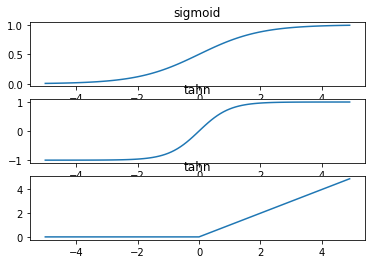

In [14]:
import torch
import matplotlib.pyplot as plt
x = torch.arange(-5., 5., 0.1)
y1 = torch.sigmoid(x)
y2 = torch.tanh(x)#(e^-x - e^-x)/(e^-x + e^-x)
y3 = torch.relu(x)
plt.subplot(3,1,1)
plt.title('sigmoid')
plt.plot(x.numpy(), y1.numpy())

plt.subplot(3,1,2)
plt.title('tahn')
plt.plot(x.numpy(), y2.numpy())

plt.subplot(3,1,3)
plt.title('tahn')
plt.plot(x.numpy(), y3.numpy())
plt.show()

In [16]:
"""
softmax 
"""
import torch.nn as nn
import torch
softmax = nn.Softmax(dim = 1)
x = torch.randn(1,3)
y = softmax(x)
describe(x)
describe(y)
print(torch.sum(y, dim = 1))

Type:torch.FloatTensor
Shape/size: torch.Size([1, 3])
Values: 
tensor([[-0.3335,  0.5046,  1.4387]])
Type:torch.FloatTensor
Shape/size: torch.Size([1, 3])
Values: 
tensor([[0.1087, 0.2514, 0.6398]])
tensor([1.])


In [18]:
"""
loss function
"""

import torch
import torch.nn as nn
"""
mean squared error loss
"""
mse_loss = nn.MSELoss()  #平方差损失
outputs = torch.rand(3,5, requires_grad = True) #追踪下滑
targets = torch.rand(3,5)
loss = mse_loss(outputs,targets)
print(loss)



tensor(0.1502, grad_fn=<MseLossBackward>)


In [21]:
"""
cross-entropy loss 交叉熵
"""

ce_loss = nn.CrossEntropyLoss()
outputs = torch.rand(3,5, requires_grad = True) #追踪下滑
targets = torch.tensor([1,0,3], dtype = torch.int64)
loss = ce_loss(outputs, targets)

print(loss)

tensor(1.9314, grad_fn=<NllLossBackward>)
